In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/junyuwu/Cosmetics /components/cosmetics.csv")

In [3]:
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [4]:
df.isna().sum()

Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [84]:
X = df[["Combination", "Dry", "Normal", "Oily", "Sensitive"]].values
y = df["Price"]
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [6]:
model.predict([[1,0,1,1,0]])

array([48.81554707])

In [94]:
X = df[["Combination", "Dry", "Normal", "Oily", "Sensitive"]].values
y = df["Price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.020995347113506035

In [7]:
# plt.scatter(df["meas_depth"], df["total_sales_price"],c="red", marker="+")
# plt.scatter(30, model.predict([[30]]),c="red",s=400, marker="*")
# plt.scatter(80, model.predict([[80]]),c="green",s=400, marker="*")
# plt.plot(df["meas_depth"], model.predict(X))
# plt.ylabel("total_sales_price")
# plt.xlabel("meas_depth");

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


/var/folders/tr/00d44tjd3wz1f_ccm0ktlwp80000gn/T/ipykernel_37426/3985971350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr())
/var/folders/tr/00d44tjd3wz1f_ccm0ktlwp80000gn/T/ipykernel_37426/3985971350.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, mask = mask,annot_kws={"size":14})


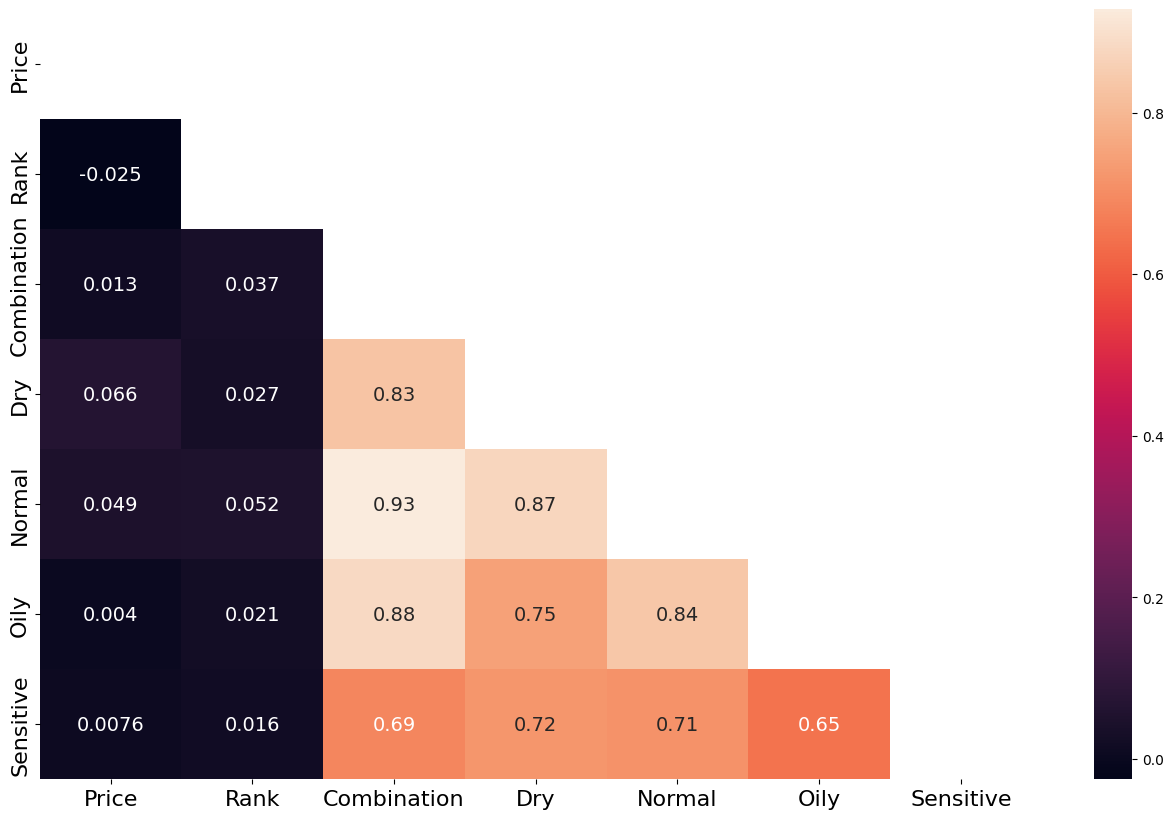

In [9]:
mask = np.zeros_like(df.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True, mask = mask,annot_kws={"size":14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

In [12]:
X = df[ list(df.columns)[6:]]
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=.2)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.02711864406779661

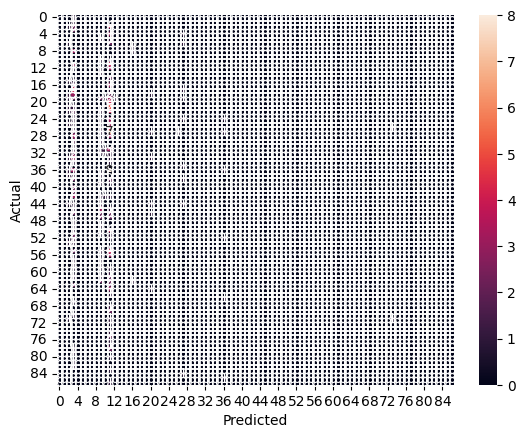

In [13]:
# Confusion Matrix

pred = model.predict(X_test)

cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True, fmt="d")

plt.ylabel("Actual")
plt.xlabel("Predicted");

In [15]:
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [39]:
bybrand = df["Brand"].value_counts()[:10].to_frame()
bybrand.reset_index(inplace=True)
bybrand

,index,Brand
0,CLINIQUE,79
1,SEPHORA COLLECTION,66
2,SHISEIDO,63
3,ORIGINS,54
4,MURAD,47
5,PETER THOMAS ROTH,46
6,KIEHL'S SINCE 1851,46
7,FRESH,44
8,DR. JART+,41
9,KATE SOMERVILLE,35


In [38]:
df["Name"].value_counts()

Crème de la Mer                                       1
Cocoa Moisture Mask                                   1
Lip Mask                                              1
Extra-Firming Mask                                    1
pores no more® Vacuum Cleaner® Pore Purifying Mask    1
                                                     ..
Renewing Cleansing Cream                              1
High Potency Classics: Nutritive Cleanser             1
Essential-C Toner                                     1
Bergamot Herbal Extract Toner                         1
DERMAPROTECT Daily Defense Broad Spectrum SPF 50+     1
Name: Name, Length: 1472, dtype: int64

In [33]:
df.groupby("Brand")[["Price"]].mean().sort_values("Price", ascending=False)[:10].round()

,Price
Brand,
LA MER,184.0
BIOEFFECT,171.0
LIGHTSTIM,169.0
SK-II,157.0
LANCER,136.0
OMOROVICZA,128.0
GUERLAIN,119.0
AMOREPACIFIC,104.0
KAPLAN MD,100.0


In [45]:
bybrand = df["Brand"].value_counts()[:10]
bybrand = bybrand.reset_index()
bybrand.rename(columns={"index":"brand_Name","Brand":"Amount"},inplace=True)
bybrand

,brand_Name,Amount
0,CLINIQUE,79
1,SEPHORA COLLECTION,66
2,SHISEIDO,63
3,ORIGINS,54
4,MURAD,47
5,PETER THOMAS ROTH,46
6,KIEHL'S SINCE 1851,46
7,FRESH,44
8,DR. JART+,41
9,KATE SOMERVILLE,35


In [47]:
byprice = df.groupby("Brand")[["Price"]].mean().sort_values(
    "Price", ascending=False)[:10].round()
byprice.reset_index(inplace=True)
byprice.rename(columns={"Brand": "Brand_Name"}, inplace=True)
byprice

,Brand_Name,Price
0,LA MER,184.0
1,BIOEFFECT,171.0
2,LIGHTSTIM,169.0
3,SK-II,157.0
4,LANCER,136.0
5,OMOROVICZA,128.0
6,GUERLAIN,119.0
7,AMOREPACIFIC,104.0
8,KAPLAN MD,100.0
9,DIOR,95.0


In [50]:
X = df[["Rank"]]
y = df["Price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

-0.007293426094829858

In [57]:
df.groupby("Combination")[["Price"]].mean()

,Price
Combination,
0,54.802372
1,55.993789


In [62]:
bycom = df.groupby("Combination")[["Price"]].mean()
bycom = bycom.reset_index()
bycom

,Combination,Price
0,0,54.802372
1,1,55.993789


In [63]:
df.groupby("Dry")[["Price"]].mean()

,Price
Dry,
0,51.864437
1,57.921460


In [82]:
df.groupby("Label")[["Price"]].mean().sort_values("Price")

,Price
Label,
Cleanser,32.601423
Face Mask,42.624060
Sun protect,45.905882
Eye cream,63.602871
Moisturizer,69.087248
Treatment,79.177419


In [80]:
expensive = df[df["Label"]=="Treatment"]
byexpensive = expensive.groupby("Brand")[["Price"]].mean().sort_values("Price",ascending=False)[:10].round()
byexpensive = byexpensive.reset_index()
byexpensive

,Brand,Price
0,LA MER,263.0
1,LANCER,213.0
2,BIOEFFECT,198.0
3,SK-II,195.0
4,LIGHTSTIM,169.0
5,GUERLAIN,150.0
6,FOREO,149.0
7,SHISEIDO,131.0
8,AMOREPACIFIC,130.0
9,OMOROVICZA,125.0
